Задание 1:
1. Сгенерировать выборки объема N (параметр N задать произвольно в
диапазоне от 100 до 200) следующих распределений:
- Биномиальное,
- Геометрическое.

Для каждого распределения параметры задать самостоятельно.
2. Построить полигон частот и эмпирическую функцию распределения.
3. Найти оценки числовых характеристик (выборочные среднее,
дисперсию, СКО, моду, медиану, коэффициенты асимметрии и
эксцесса).
4. Найти теоретические математическое ожидание и дисперсию при
заданных параметрах. Сравнить найденные точечные оценки с
теоретическими характеристиками.
5. Найти оценки параметров соответствующего распределения.
Сравнить полученные оценки с заданными теоретическими
значениями.
6. Проверить гипотезу о виде распределения с помощью критерия Хи-квадрат.

[1] 4 4 5 7 9 7 6 7 5 4 5 6 6 7 7 6 5 1 6 6 5 7 4 2 8 4 5 4 3 5 5 7 7 5 5 2 6
 [38] 4 3 8 4 5 4 4 4 7 6 5 4 3 5 7 6 7 6 5 8 6 4 4 4 6 7 5 4 6 5 4 6 5 6 7 5 6
 [75] 8 7 4 7 4 6 5 6 7 7 4 5 6 5 5 7 5 6 6 5 7 5 6 2 4 4 5 8 1 4 8 3 6 4 6 8 5
[112] 7 6 5 5 5 6 3 7 5

[1]  0 10  1 43 33  4 45  3 40 27 10 56 18 22 26 15 39  4 86  9  1 36 17 36  1
 [26]  2  1 22 46 17 21  4  4  4 20  9 14 22 20  9 40 49  5  0 38 29 21 40 13  5
 [51]  5 11  5 16 17 25  2  0 33 27 21 39 12 13  1 15 20  8  1  4 18 16 47  7 13
 [76]  9 48 63  6 25  1 16 32 21 23 61 50  7 26 10  5 18  1  2  2 26  4  5  0  3
[101] 22  5  3 13 54  2 29  2 28 37 16  5  9 67 10  6 25 41  1 12  0 10 13 16  6
[126] 36  5 37  1  4 11 24 37  1 28  8 10 41 20  0  7  3 11 13  1 10 32 19  3  3
[151]  0 32 11 50  9 99 33  8 18  9  8  7 10 21 40 26 13 20 56 33 22  9  3  4 16
[176]  6 56 11 14 29

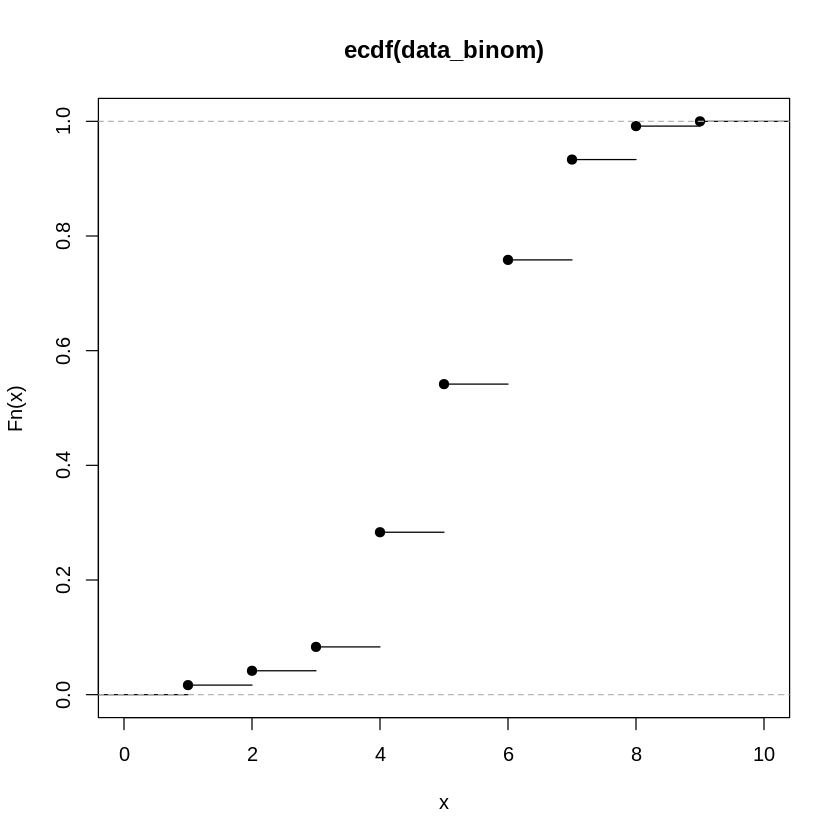

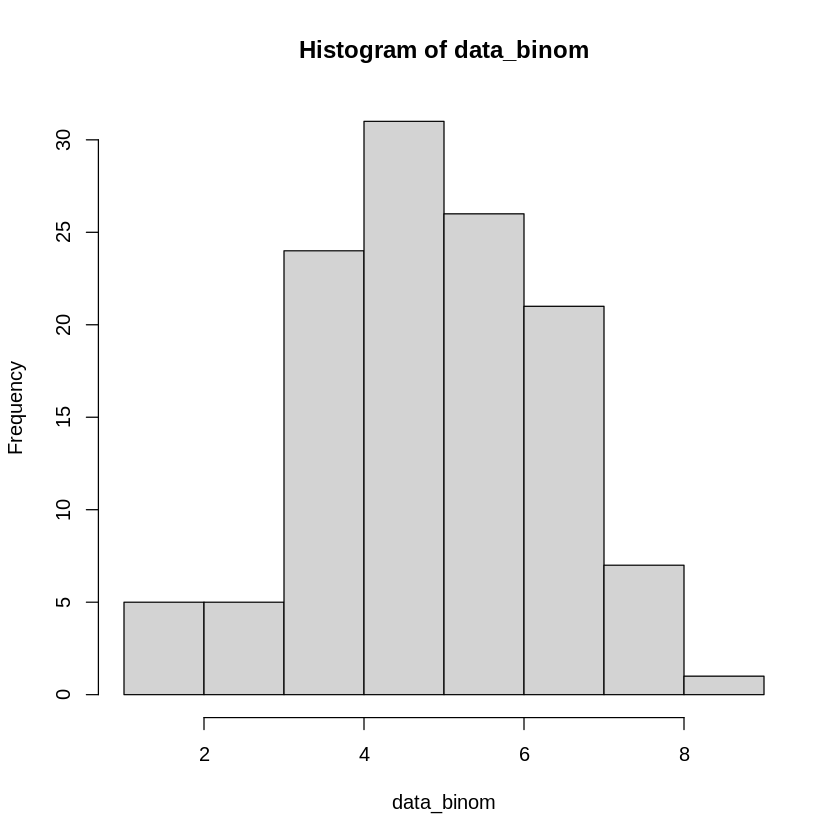

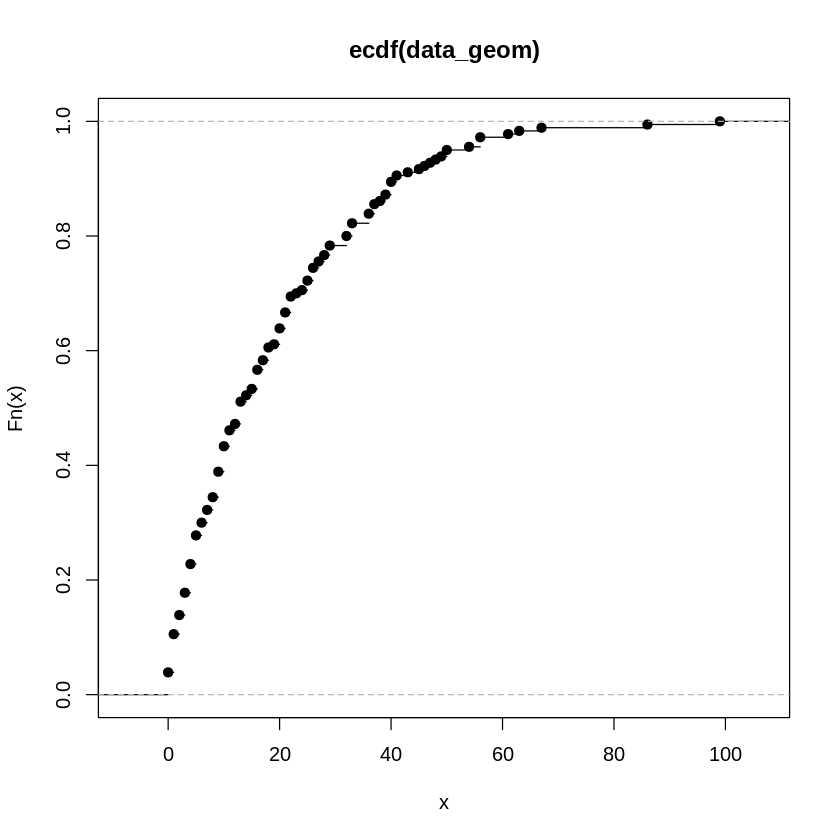

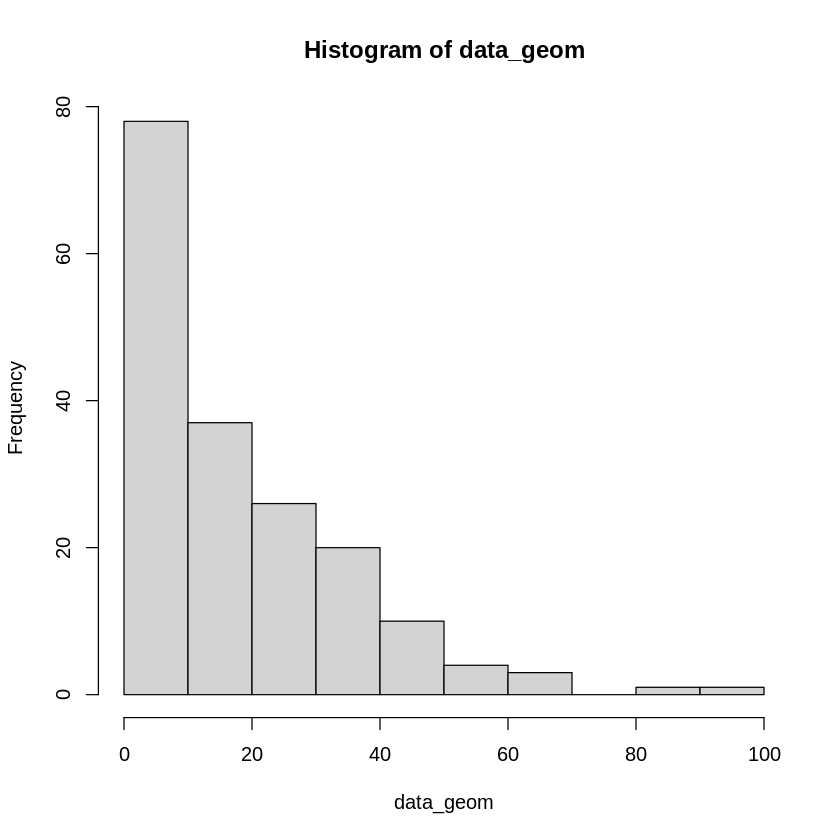

In [ ]:
# 1

# 1.1
N_binom = 120
p_binom = 0.5
n_binom = 10
data_binom = rbinom(N_binom, n_binom, p_binom)
data_binom

N_geom = 180
p_geom = 0.05
data_geom = rgeom(N_geom, p_geom)
data_geom

# 1.2
plot(ecdf(data_binom))
hist(data_binom)

plot(ecdf(data_geom))
hist(data_geom)

In [ ]:
install.packages("moments")
library("moments")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# 1.3
moda_binom = sort(unique(data_binom))[which.max(table(data_binom))] # мода
num_characteristic_binom = c(mean(data_binom), var(data_binom), sd(data_binom), moda_binom, median(data_binom), skewness(data_binom), kurtosis(data_binom))
num_characteristic_binom

moda_geom = sort(unique(data_geom))[which.max(table(data_geom))] # мода
num_characteristic_geom = c(mean(data_geom), var(data_geom), sd(data_geom), moda_geom, median(data_geom), skewness(data_geom), kurtosis(data_geom))
num_characteristic_geom

[1]  5.3500000  2.3302521  1.5265163  5.0000000  5.0000000 -0.2901535  3.1361366

[1]  18.594444 303.840192  17.431012   1.000000  13.000000   1.475710   5.771036

In [ ]:
# 1.4
MX_binom = n_binom * p_binom
q_binom = 1 - p_binom
DX_binom = n_binom * p_binom * q_binom

MX_binom
q_binom
DX_binom

q_geom = 1 - p_geom
MX_geom = q_geom / p_geom
DX_geom = q_geom / (p_geom * p_geom)

MX_geom
q_geom
DX_geom

[1] 5

[1] 0.5

[1] 2.5

[1] 19

[1] 0.95

[1] 380

In [ ]:
install.packages("fitdistrplus")
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# 1.5
# ММП
library(fitdistrplus) # подключаем библиотеки
library(MASS)

fitdist(data_binom,'binom') # оценка параметров функцией пакета fitdistrplus

fitdistr(data_geom,'geometric') # оценка параметров функцией пакета MASS

Fitting of the distribution ' binom ' by maximum likelihood 
Parameters:
       estimate   Std. Error
size 10.0000000 3.051758e-08
prob  0.5644389 1.420414e-02

      prob    
  0.051034874 
 (0.003705578)

In [ ]:
# ММ
p_binom_MM = mean(data_binom) / n_binom
p_binom_MM

p_geom_MM = 1 / (mean(data_geom) + 1)
p_geom_MM

[1] 0.535

[1] 0.05103487

In [ ]:
# 1.6
# задаем параметры распределения (заданы выше)
# генерируем вектор из N наблюдений с задаными параметрами
xhc = hist(data_binom, plot=FALSE)$counts # сохраняем абсолютные частоты
xhb = hist(data_binom, plot=FALSE)$breaks # сохраняем границы интервалов разбиения
k = length(xhc) # количество интервалов разбиения
xhb[1] = -Inf; xhb[k+1] = Inf # раздвигаем границы (только крайние значения интервалов разбиения) до бесконечности
pnth = pbinom(xhb, n_binom, p_binom) # для тех же границ интервалов находим значения теоретической функции распределения
# если теоретические характеристики распределения не известны, можно оценить их по выборке
thfr=pnth[2:(k+1)]-pnth[1:k] # рассчитываем теоретические относительные накопленные частоты
chisq.test(xhc,p=thfr) # с помощью теста Хи-2 проводим сравнение теоретических и выборочных частот

# задаем параметры распределения (заданы выше)
# генерируем вектор из N наблюдений с задаными параметрами
xhc = hist(data_geom, plot=FALSE)$counts # сохраняем абсолютные частоты
xhb = hist(data_geom, plot=FALSE)$breaks # сохраняем границы интервалов разбиения
k = length(xhc) # количество интервалов разбиения
xhb[1] = -Inf; xhb[k+1] = Inf # раздвигаем границы (только крайние значения интервалов разбиения) до бесконечности
pnth = pgeom(xhb, p_geom) # для тех же границ интервалов находим значения теоретической функции распределения
# если теоретические характеристики распределения не известны, можно оценить их по выборке
thfr=pnth[2:(k+1)]-pnth[1:k] # рассчитываем теоретические относительные накопленные частоты
chisq.test(xhc,p=thfr) # с помощью теста Хи-2 проводим сравнение теоретических и выборочных частот

Warning message in chisq.test(xhc, p = thfr):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  xhc
X-squared = 10.432, df = 7, p-value = 0.1654


Warning message in chisq.test(xhc, p = thfr):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  xhc
X-squared = 5.0425, df = 9, p-value = 0.8306


Задание 2:
1. Сгенерировать выборки объема N (параметр N задать произвольно в
диапазоне от 100 до 200) следующих распределений:
- Экспоненциальное,
- Гамма-распределение.

Для каждого распределения параметры задать самостоятельно.
2. Построить гистограмму относительных частот и график плотности
соответствующего теоретического распределения и оценки
плотности.
3. Найти оценки числовых характеристик (выборочные среднее,
дисперсию, СКО, моду, медиану, коэффициенты асимметрии и
эксцесса.)
4. Найти теоретические мат ожидание и дисперсию при заданных
параметрах. Сравнить найденные точечные оценки с теоретическими
характеристиками.
5. Найти оценки параметров соответствующего распределения.
6. Проверить гипотезу о виде распределения с помощью критерия Хи-квадрат.

[1] 0.1328838317 0.2000269998 0.0017198690 0.1196013344 0.2956993415
  [6] 0.4687995695 0.1093027581 0.0141677428 0.0227120553 0.8079932437
 [11] 0.1265444955 0.0782067788 0.2980711806 1.0653437301 0.8263929529
 [16] 0.0119271829 0.0739646548 0.4527633212 0.0736261015 0.2695898597
 [21] 0.2238436419 0.2416948828 0.1781327082 0.2213492754 0.2643501960
 [26] 0.9418141701 0.0782201051 0.7537590966 0.5442968358 0.0046154357
 [31] 0.3076781052 0.3193217873 0.0943970865 0.7858619090 0.7442801663
 [36] 0.2637659246 0.4265058131 0.0700338658 1.2250734521 1.4507163924
 [41] 0.7012414478 0.1310656656 0.1182074399 0.5767659731 0.1082377195
 [46] 0.3691422921 0.4698651403 0.0260445660 0.1874128957 0.0853527066
 [51] 0.9444102197 0.3806034015 0.6399844146 0.1189486794 0.2779000550
 [56] 0.6861805940 0.2346907997 0.5117347222 0.0172354776 0.1203759074
 [61] 0.6149964972 0.0578567417 0.7129407955 0.0412952564 0.0397477897
 [66] 0.0023003779 0.2214232410 0.0758252901 0.1053028270 0.2987004417
 [71] 0.3527626699 0.1082829690 0.1875672066 0.0075284091 0.5195803127
 [76] 0.1334911555 0.2715090560 0.2633687863 0.2809252037 0.1740560690
 [81] 0.1139223015 0.0389654601 0.1106288014 0.0164494138 0.1720507364
 [86] 0.2255731290 0.0292403243 0.2149268412 0.0040160193 0.0867507177
 [91] 0.1422044084 0.0538208723 0.0906024748 1.3181844719 0.0612043349
 [96] 0.3656665459 0.4841790814 0.0337906422 0.2301881178 0.0283145860
[101] 0.1868578882 0.3718974208 0.0686852541 1.1126017992 0.0977648852
[106] 0.0566517529 1.3220181125 0.1207686819 0.3626775397 0.8479075500
[111] 1.4167899757 0.1681750002 0.2316440170 0.0000271198 0.0633432454
[116] 0.7314366318 0.0180597496 1.2090452679 0.3019455181 0.0205398297

[1] 0.24750640 0.64678365 0.45757951 0.10692084 0.55771839 0.19392293
  [7] 0.55995638 0.28472401 0.07342745 0.15799885 0.65472973 0.15481080
 [13] 0.20166139 0.38650254 0.30410282 0.97245726 0.27181921 0.08679073
 [19] 0.32859642 0.22908777 0.14802516 0.49743210 0.14799291 0.12844060
 [25] 0.16998643 0.70093014 0.16755386 0.28034041 0.41331390 0.17733035
 [31] 0.63664431 0.67718107 0.36505081 0.25839426 0.21728918 0.33063250
 [37] 0.24173941 0.71410746 0.65167053 1.04054042 0.27357702 0.47673211
 [43] 0.18370261 0.61026093 0.11348977 0.07128767 0.19678978 0.04647075
 [49] 0.37324612 0.11825424 0.71706533 0.12206199 0.33983211 0.03240270
 [55] 0.60921378 0.09488459 0.41759275 0.11903318 0.72581052 0.61894990
 [61] 0.17052857 0.45210114 1.38770805 0.22172779 0.32142080 0.25001215
 [67] 0.40116424 0.25946208 0.12465321 0.22141919 0.29584147 0.32267220
 [73] 0.72075909 0.10325324 0.35530381 0.44789163 0.17391201 0.20520962
 [79] 0.39999256 0.73858935 0.37794302 0.19239899 0.32381091 0.09130305
 [85] 0.39859124 0.60671239 0.39186369 0.29615526 0.93754742 0.21825911
 [91] 0.33747367 0.13813063 0.43825525 0.41055197 0.12095549 0.47761816
 [97] 0.17871404 1.07957177 0.17106769 0.55940161 0.33287825 0.63973672
[103] 0.76602111 0.64184079 0.53214533 0.25454403 0.04045312 0.48224441
[109] 0.17697539 0.48104336 0.09300022 0.19977171 0.77376878 0.02991581
[115] 0.23614252 0.85961017 0.18357265 0.37789880 0.37626745 0.36411500
[121] 0.32883390 0.03809760 0.27205259 0.29777409 0.20620197 1.04094192
[127] 0.11201147 0.64587729 0.29889245 0.26943767 0.92532284 0.03323174
[133] 0.16268877 1.19846502 0.32118464 0.49365940 0.48273652 0.73941228
[139] 0.13098319 0.16414631 0.39006970 0.18239022 0.78411535 0.16113347
[145] 0.24275461 0.61512798 0.85080413 0.86689051 0.44305892 0.67331707
[151] 0.11927467 0.70404027 0.71730979 0.53342514 0.31209998 0.91345889
[157] 0.79457603 0.16116441 0.62071115 0.06406158 0.19651663 0.26528747
[163] 0.18272906 0.24880495 0.12536812 0.14641783 0.07902200 0.68140926
[169] 0.02758956 0.46864539 0.55762571 0.37602951 0.87163820 0.28639438
[175] 0.13152009 0.25138615 0.46376590 0.37583331 0.28241824 0.25195262

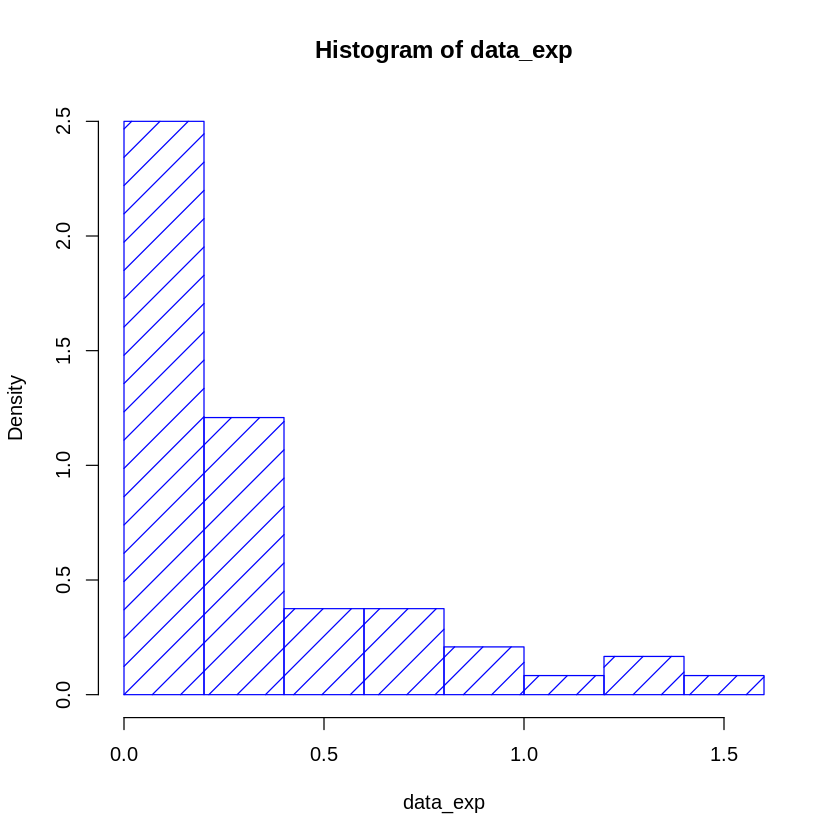

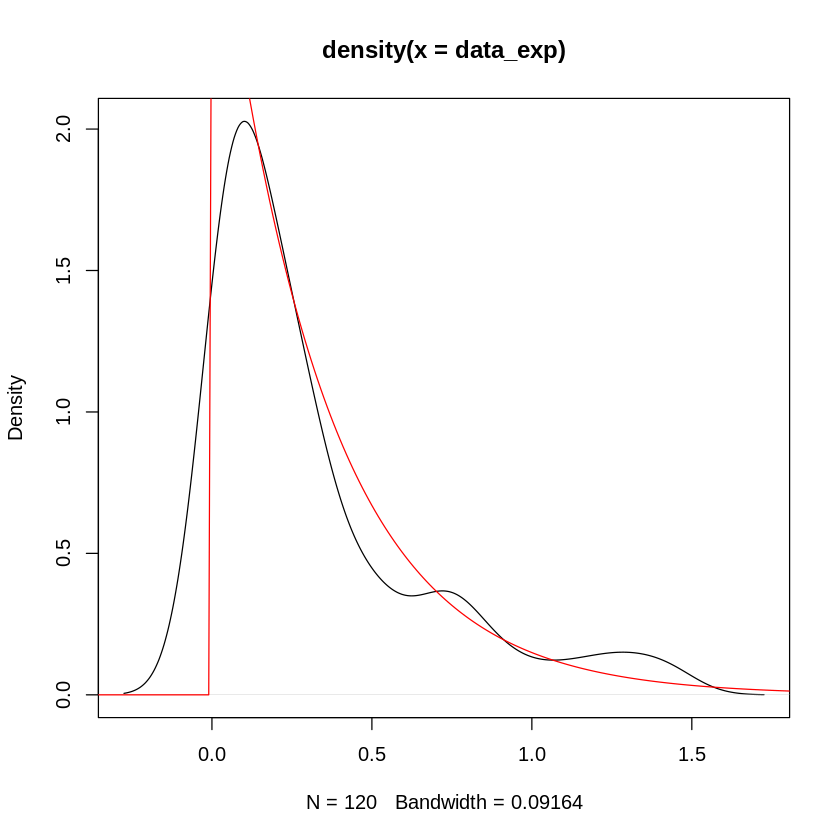

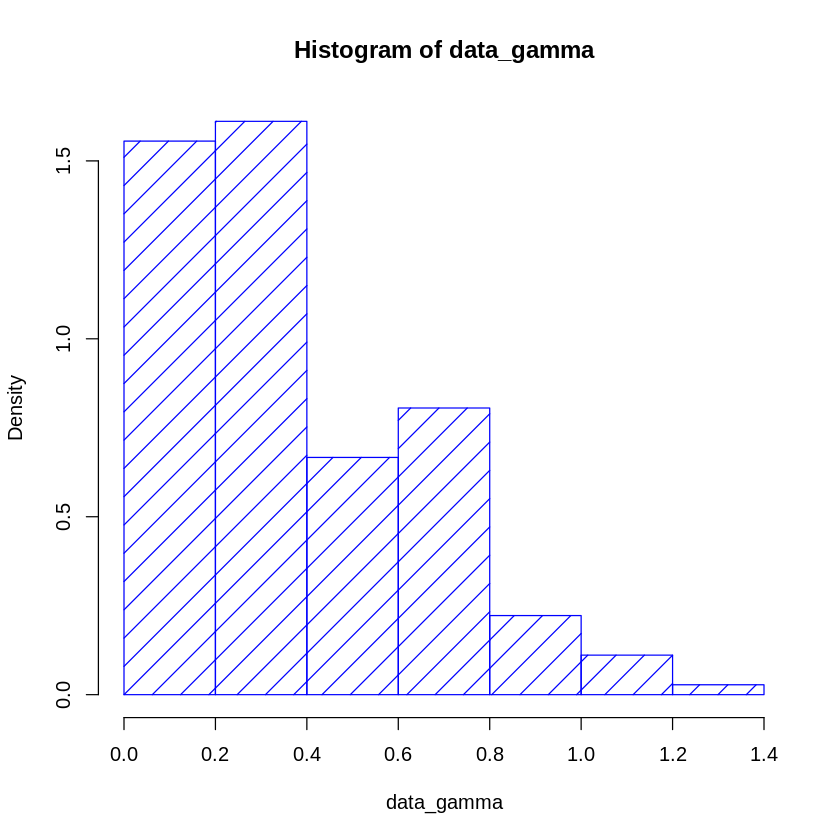

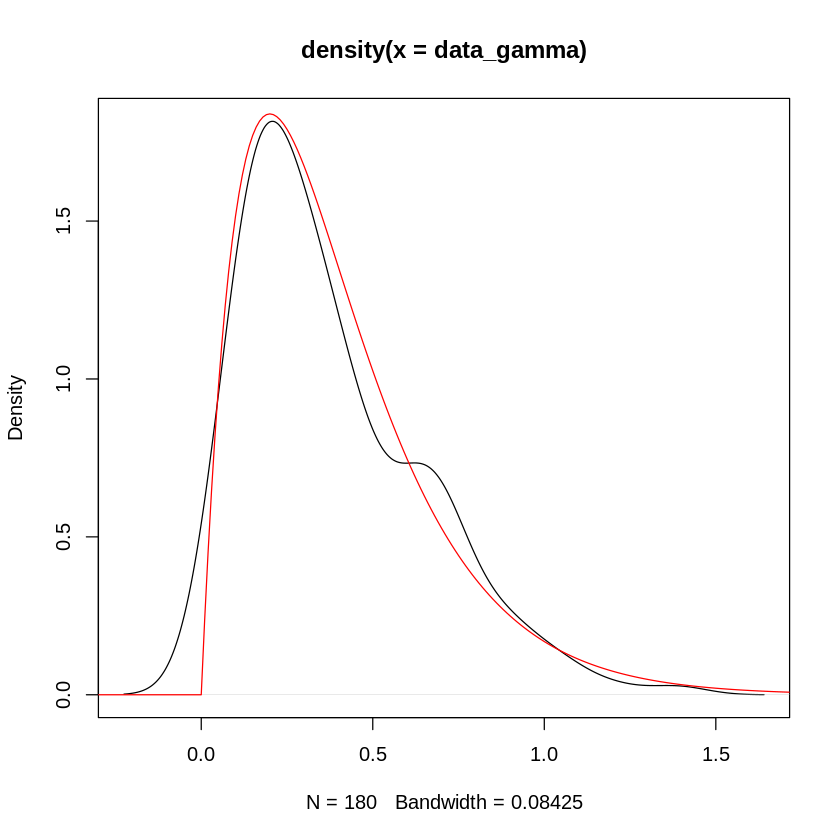

In [ ]:
# 2

# 2.1
N_exp = 120
lambda_exp = 3
data_exp = rexp(N_exp, lambda_exp)
data_exp

N_gamma = 180
alpha_gamma = 2
betta_gamma = 5
data_gamma = rgamma(N_gamma, alpha_gamma, betta_gamma)
data_gamma

# 2.2
hist(data_exp, freq=FALSE, density=6, angle=45, col="blue")
plot(density(data_exp))
x1=seq(-3,9,0.01) # задаем диапазон изменения х для построения графика плотности
y1=dexp(x1, lambda_exp) # вычисляем значения плотности при известных параметрах
lines(x1, y1, col='red') # строим график плотности

hist(data_gamma, freq=FALSE, density=6, angle=45, col="blue")
plot(density(data_gamma))
x1=seq(-3,9,0.01) # задаем диапазон изменения х для построения графика плотности
y1=dgamma(x1, alpha_gamma, betta_gamma) # вычисляем значения плотности при известных параметрах
lines(x1, y1, col='red') # строим график плотности

In [ ]:
# 2.3
moda_exp = sort(unique(data_exp))[which.max(table(data_exp))] # мода
num_characteristic_exp = c(mean(data_exp), var(data_exp), sd(data_exp), moda_exp, median(data_exp), skewness(data_exp), kurtosis(data_exp))
num_characteristic_exp

moda_gamma = sort(unique(data_gamma))[which.max(table(data_gamma))] # мода
num_characteristic_gamma = c(mean(data_gamma), var(data_gamma), sd(data_gamma), moda_gamma, median(data_gamma), skewness(data_gamma), kurtosis(data_gamma))
num_characteristic_gamma

[1] 0.3191118799 0.1197186692 0.3460038571 0.0000271198 0.1937971032
[6] 1.5658450333 4.7924440603

[1] 0.38247963 0.06994563 0.26447235 0.02758956 0.31664231 1.03231912 3.75330072

In [ ]:
# 2.4
MX_exp = 1 / lambda_exp
DX_exp = 1 / (lambda_exp * lambda_exp)

MX_exp
DX_exp

MX_gamma = alpha_gamma / betta_gamma
DX_gamma = alpha_gamma / (betta_gamma * betta_gamma)

MX_gamma
DX_gamma

[1] 0.3333333

[1] 0.1111111

[1] 0.4

[1] 0.08

In [ ]:
# 2.5
# ММП
library(fitdistrplus) # подключаем библиотеки
library(MASS)

fitdist(data_exp,'exp') # оценка параметров функцией пакета fitdistrplus

fitdistr(data_gamma,'gamma') # оценка параметров функцией пакета MASS

Fitting of the distribution ' exp ' by maximum likelihood 
Parameters:
     estimate Std. Error
rate 3.133697  0.2860661

Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”


     shape       rate   
  2.0189921   5.2786917 
 (0.1977614) (0.5865274)

In [ ]:
# ММ
lambda_exp_MM = 1 / mean(data_exp)
lambda_exp_MM

alpha_gamma_MM = (mean(data_gamma) * mean(data_gamma)) / var(data_gamma)
betta_gamma_MM = mean(data_gamma) / var(data_gamma)
alpha_gamma_MM
betta_gamma_MM

[1] 3.133697

[1] 2.091491

[1] 5.468242

In [ ]:
# 2.6
# задаем параметры распределения (заданы выше)
# генерируем вектор из N наблюдений с задаными параметрами
xhc = hist(data_exp, plot=FALSE)$counts # сохраняем абсолютные частоты
xhb = hist(data_exp, plot=FALSE)$breaks # сохраняем границы интервалов разбиения
k = length(xhc) # количество интервалов разбиения
xhb[1] = -Inf; xhb[k+1] = Inf # раздвигаем границы (только крайние значения интервалов разбиения) до бесконечности
pnth = pexp(xhb, lambda_exp) # для тех же границ интервалов находим значения теоретической функции распределения
# если теоретические характеристики распределения не известны, можно оценить их по выборке
thfr=pnth[2:(k+1)]-pnth[1:k] # рассчитываем теоретические относительные накопленные частоты
chisq.test(xhc,p=thfr) # с помощью теста Хи-2 проводим сравнение теоретических и выборочных частот

# задаем параметры распределения (заданы выше)
# генерируем вектор из N наблюдений с задаными параметрами
xhc = hist(data_gamma, plot=FALSE)$counts # сохраняем абсолютные частоты
xhb = hist(data_gamma, plot=FALSE)$breaks # сохраняем границы интервалов разбиения
k = length(xhc) # количество интервалов разбиения
xhb[1] = -Inf; xhb[k+1] = Inf # раздвигаем границы (только крайние значения интервалов разбиения) до бесконечности
pnth = pgamma(xhb, alpha_gamma, betta_gamma) # для тех же границ интервалов находим значения теоретической функции распределения
# если теоретические характеристики распределения не известны, можно оценить их по выборке
thfr=pnth[2:(k+1)]-pnth[1:k] # рассчитываем теоретические относительные накопленные частоты
chisq.test(xhc,p=thfr) # с помощью теста Хи-2 проводим сравнение теоретических и выборочных частот

Warning message in chisq.test(xhc, p = thfr):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  xhc
X-squared = 8.4238, df = 7, p-value = 0.2967


Warning message in chisq.test(xhc, p = thfr):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  xhc
X-squared = 12.636, df = 6, p-value = 0.0492
